In [ ]:
# mount our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import any needed libraries
import numpy as np
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import os
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image
from PIL import UnidentifiedImageError

In [ ]:
# Reference from Tut_3b
# define training, validation, and testing data directories
data_path = '/content/drive/My Drive/APS360Project/split'
train_path = os.path.join(data_path, 'train/')
valid_path = os.path.join(data_path, 'val/')
test_path = os.path.join(data_path, 'test/')

# load and transform data using ImageFolder
# resize all images to 224 x 224
data_transform = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor()])


In [ ]:
import os
import shutil

In [ ]:
# prompt: give me code to put all img files in a source folder into 2 folders named "1" or "0" given file names contains '1' or '0'



'''
source_folder = "/content/drive/MyDrive/APS360Project/split/train/"
target_folder_1 = "/content/drive/MyDrive/APS360Project/split/train/11/"
target_folder_0 = "/content/drive/MyDrive/APS360Project/split/train/00/"

for filename in os.listdir(source_folder):
    if "class1" in filename:
        shutil.copy(os.path.join(source_folder, filename), target_folder_1)
    elif "class0" in filename:
        shutil.copy(os.path.join(source_folder, filename), target_folder_0)
'''

'\nsource_folder = "/content/drive/MyDrive/APS360Project/split/train/"\ntarget_folder_1 = "/content/drive/MyDrive/APS360Project/split/train/11/"\ntarget_folder_0 = "/content/drive/MyDrive/APS360Project/split/train/00/"\n\nfor filename in os.listdir(source_folder):\n    if "class1" in filename:\n        shutil.copy(os.path.join(source_folder, filename), target_folder_1)\n    elif "class0" in filename:\n        shutil.copy(os.path.join(source_folder, filename), target_folder_0)\n'

In [ ]:
'''
source_folder = "/content/drive/MyDrive/APS360Project/split/test/"
target_folder_1 = "/content/drive/MyDrive/APS360Project/split/test/11/"
target_folder_0 = "/content/drive/MyDrive/APS360Project/split/test/00/"

for filename in os.listdir(source_folder):
    if "class1" in filename:
        shutil.copy(os.path.join(source_folder, filename), target_folder_1)
    elif "class0" in filename:
        shutil.copy(os.path.join(source_folder, filename), target_folder_0)
'''

'\nsource_folder = "/content/drive/MyDrive/APS360Project/split/test/"\ntarget_folder_1 = "/content/drive/MyDrive/APS360Project/split/test/11/"\ntarget_folder_0 = "/content/drive/MyDrive/APS360Project/split/test/00/"\n\nfor filename in os.listdir(source_folder):\n    if "class1" in filename:\n        shutil.copy(os.path.join(source_folder, filename), target_folder_1)\n    elif "class0" in filename:\n        shutil.copy(os.path.join(source_folder, filename), target_folder_0)\n'

In [ ]:
'''
source_folder = "/content/drive/MyDrive/APS360Project/split/val/"
target_folder_1 = "/content/drive/MyDrive/APS360Project/split/val/11/"
target_folder_0 = "/content/drive/MyDrive/APS360Project/split/val/00/"

for filename in os.listdir(source_folder):
    if "class1" in filename:
        shutil.copy(os.path.join(source_folder, filename), target_folder_1)
    elif "class0" in filename:
        shutil.copy(os.path.join(source_folder, filename), target_folder_0)
'''

'\nsource_folder = "/content/drive/MyDrive/APS360Project/split/val/"\ntarget_folder_1 = "/content/drive/MyDrive/APS360Project/split/val/11/"\ntarget_folder_0 = "/content/drive/MyDrive/APS360Project/split/val/00/"\n\nfor filename in os.listdir(source_folder):\n    if "class1" in filename:\n        shutil.copy(os.path.join(source_folder, filename), target_folder_1)\n    elif "class0" in filename:\n        shutil.copy(os.path.join(source_folder, filename), target_folder_0)\n'

In [ ]:


 # Skip this batch and move to the next
'''
# Further split the training set into training and validation sets
train_set, val_set = train_test_split(train_set, test_size=0.2, random_state=42)
'''
'''
# Create data loaders for each set
train_loader = DataLoader(train_set, batch_size=2, shuffle=True)
val_loader = DataLoader(val_set, batch_size=2, shuffle=True)
test_loader = DataLoader(test_set, batch_size=2, shuffle=True)
# define dataloader parameters
# choose a small size, ensuring the model can fit within the memory constraints
batch_size  = 20
# positive num_workers can speed up the data-loading process
# the datasets in lab3 is large, so set num_workers=2 to help accelerate process
num_workers = 2

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(valid_data,batch_size=batch_size,
                                         num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)
'''


'\n# Create data loaders for each set\ntrain_loader = DataLoader(train_set, batch_size=2, shuffle=True)\nval_loader = DataLoader(val_set, batch_size=2, shuffle=True)\ntest_loader = DataLoader(test_set, batch_size=2, shuffle=True)\n# define dataloader parameters\n# choose a small size, ensuring the model can fit within the memory constraints\nbatch_size  = 20\n# positive num_workers can speed up the data-loading process\n# the datasets in lab3 is large, so set num_workers=2 to help accelerate process\nnum_workers = 2\n\n# prepare data loaders\ntrain_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,\n                                         num_workers=num_workers, shuffle=True)\nval_loader = torch.utils.data.DataLoader(valid_data,batch_size=batch_size,\n                                        num_workers=num_workers, shuffle=True)\ntest_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,\n                                         num_workers=num_w

In [ ]:
'''
class LabSmallCNN(nn.Module):
    def __init__(self):
        super(LabSmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(4, 5, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(5 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 5 * 56 * 56)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
''''

SyntaxError: unterminated string literal (detected at line 24) (<ipython-input-16-5be34d0c5d21>, line 24)

In [ ]:
'''
def train(model, dataloader, batch_size=64, num_epochs=1):
    train_loader = dataloader
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy
            val_acc.append(get_accuracy(model, train_loader))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    '''

'\ndef train(model, dataloader, batch_size=64, num_epochs=1):\n    train_loader = dataloader\n    criterion = nn.CrossEntropyLoss()\n    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)\n\n    iters, losses, train_acc, val_acc = [], [], [], []\n\n    # training\n    n = 0 # the number of iterations\n    for epoch in range(num_epochs):\n        for imgs, labels in iter(train_loader):\n\n            out = model(imgs)             # forward pass\n\n            loss = criterion(out, labels) # compute the total loss\n            loss.backward()               # backward pass (compute parameter updates)\n            optimizer.step()              # make the updates for each parameter\n            optimizer.zero_grad()         # a clean up step for PyTorch\n\n            # save the current training information\n            iters.append(n)\n            losses.append(float(loss)/batch_size)             # compute *average* loss\n            train_acc.append(get_accuracy(model, train

In [ ]:
'''
# pr'ompt: get accuracy for a binary classification CNN model
use_cuda = True
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            if use_cuda and torch.cuda.is_available():
              images = images.cuda()
              labels = labels.cuda()
              outputs = model(images)
            else:
              outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total
    '''

In [ ]:
'''
def get_accuracy(model, data_loader):
    correct = 0
    total = 0

    for imgs, labels in data_loader:

        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total
    '''

In [ ]:
def get_accuracy(model, data_loader, threshold=0.5):
    correct = 0
    total = 0

    for imgs, labels in data_loader:
        #############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #############################################

        output = model(imgs)

        # Assuming output is a probability of the positive class
        # Convert probabilities to binary predictions based on a threshold
        pred = (output > threshold).float()  # Assuming output is between 0 and 1

        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]

    return correct / total

In [ ]:
'''
print("CNN")
model = LabSmallCNN()
print(model)
train(model, train_loader, num_epochs=10)
'''

'\nprint("CNN")\nmodel = LabSmallCNN()\nprint(model)\ntrain(model, train_loader, num_epochs=10)\n'

#**SEE LAB3 CODES**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()

In [ ]:
# Reference from Tut_3b
'''
# define training, validation, and testing data directories
data_path = '/content/drive/My Drive/APS360/Lab3datasets_split'
train_path = os.path.join(data_path, 'train/')
valid_path = os.path.join(data_path, 'val/')
test_path = os.path.join(data_path, 'test/')

# classes are folders in each directory with the original file names
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

# load and transform data using ImageFolder
# resize all images to 224 x 224
data_transform = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(root=train_path, transform=data_transform)
valid_data = datasets.ImageFolder(root=valid_path, transform=data_transform)
test_data = datasets.ImageFolder(root=test_path, transform=data_transform)


# define dataloader parameters
# choose a small size, ensuring the model can fit within the memory constraints
batch_size  = 20
# positive num_workers can speed up the data-loading process
# the datasets in lab3 is large, so set num_workers=2 to help accelerate process
num_workers = 2

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(valid_data,batch_size=batch_size,
                                         num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)

# Visualize some sample data
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display


# plot the images in the batch, along with the corresponding labels
# show 3 rows with 5 columns, 3*5=15 images in total
fig = plt.figure(figsize=(20, 5))
for idx in np.arange(15):
    ax = fig.add_subplot(3, int(15/3), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

# print data stats about numbers of train, val, and test images
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num testing images: ', len(test_data))



'''

# Reference from Lab2
# Convolutional Neural Network Architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 5, 10) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size

        # Calculate fully connected layer input
        self.a = int(((((224-10+1)/2)-5+1)/2))

        self.fc1 = nn.Linear(10*self.a*self.a, 32)
        self.fc2 = nn.Linear(32, 2)

        self.name = 'CNN'

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10*self.a*self.a)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    print('Convolutional Neural Network Architecture Done')




'''
# Reference from Lab2 and Tut3b
use_cuda = True

def get_accuracy(model, data_loader):
    correct = 0
    total = 0

    for imgs, labels in data_loader:

        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total
'''


def CNN_train(model, train_data, valid_data, batch_size=1, learning_rate=0.05, num_epochs=1):

    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(100)

    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,
                                               shuffle=True)
    val_loader = torch.utils.data.DataLoader(valid_data,batch_size=batch_size,
                                              shuffle=True)

    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE)
    # so use the BCEWithLogitsLoss
    # Optimizer will be SGD with Momentum.


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []
    # Get a batch of training data

    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    itr_num = 0  # num of iterations
    for epoch in range(num_epochs):  # loop over the dataset multiple times
      try:
        i=0
        for imgs, labels in iter(train_loader):
            try:
                #############################################
                # To Enable GPU Usage

                if use_cuda and torch.cuda.is_available():
                    imgs = imgs.cuda()
                    labels = labels.cuda()
                    print("using GPU")
                #############################################

                # Forward pass, backward pass, and optimize
                outputs = model(imgs)               # forward pass
                loss = criterion(outputs, labels)   # compute the total loss
                loss.backward()                     # backward pass (compute parameter updates)
                optimizer.step()                    # make the updates for each parameter
                optimizer.zero_grad()               # a clean up step for PyTorch
                print(i)
                i+=1
            except UnidentifiedImageError as e:
                print(f"Error loading image: {e}")
                continue  # Skip this batch and move to the next


        # save the current training information
        iters.append(epoch)
        losses.append(float(loss)/batch_size) # compute *average* loss
        # compute train accuracy
        train_acc.append(get_accuracy(model, train_loader))
        # compute validation accuracy
        val_acc.append(get_accuracy(model, val_loader))

        print(("Epoch {}: Train accuracy: {} |"+
               "Validation accuracy: {}").format(epoch+1, train_acc[epoch],
                   val_acc[epoch],))

        # Save the current model (checkpoint) to a file
        model_path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(
                              model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

      except UnidentifiedImageError as e:
          print(f"Error loading image: {e}")
          continue  # Skip this batch and move to the next

    print('Finished Training')


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))


Convolutional Neural Network Architecture Done


In [ ]:
'''
train_data = datasets.ImageFolder(root=train_path, transform=data_transform)
valid_data = datasets.ImageFolder(root=valid_path, transform=data_transform)
test_data = datasets.ImageFolder(root=test_path, transform=data_transform)
'''

'\ntrain_data = datasets.ImageFolder(root=train_path, transform=data_transform)\nvalid_data = datasets.ImageFolder(root=valid_path, transform=data_transform)\ntest_data = datasets.ImageFolder(root=test_path, transform=data_transform)\n'

In [ ]:
print("CNN")
model = CNN()
if use_cuda and torch.cuda.is_available():
  model.cuda()
print(model)
data = datasets.ImageFolder(root=train_path, transform=data_transform)
data2 = datasets.ImageFolder(root=valid_path, transform=data_transform)
data3 = datasets.ImageFolder(root=test_path, transform=data_transform)
final_data = torch.utils.data.ConcatDataset([data,data2,data3])

CNN
CNN(
  (conv1): Conv2d(3, 5, kernel_size=(10, 10), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(5, 10, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=26010, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)


In [ ]:
len(data3)

9220

In [ ]:
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split

# Define the subset of the data with the first 10,000 samples

print(len(data))
print(data3.classes)


5847
['0', '1']


In [ ]:


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
train_set, val_set = train_test_split(train_set, test_size=0.2, random_state=42)


KeyboardInterrupt: 

In [ ]:
use_cuda=True
print("CNN")
model2 = CNN()

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'  # For debugging CUDA errors

print("CNN")
model = CNN()

# Check if CUDA is available and then move the model to GPU
use_cuda = True
if use_cuda and torch.cuda.is_available():
    try:
        model.cuda()
        print("Using GPU")
    except RuntimeError as e:
        print("Failed to move the model to GPU:", e)
        exit(1)

# Check model structure (debugging output)
print(model)
CNN_train(model, data,data)


CNN
CNN
Failed to move the model to GPU: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.

CNN(
  (conv1): Conv2d(3, 5, kernel_size=(10, 10), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(5, 10, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=26010, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# prompt: split the image dataset to train test and validation



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
Epoch 1: Train accuracy: 100.0 |Validation accuracy: 100.0
Finished Training


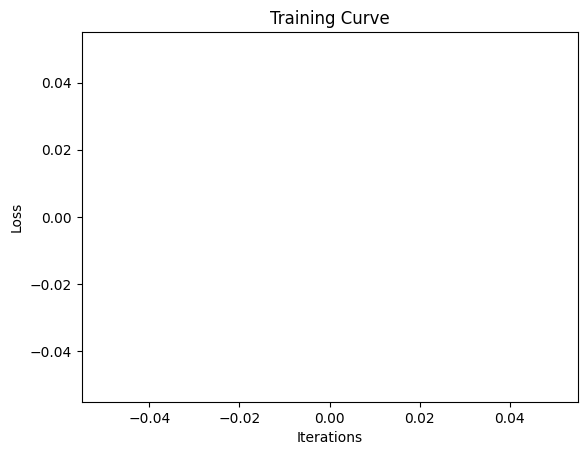

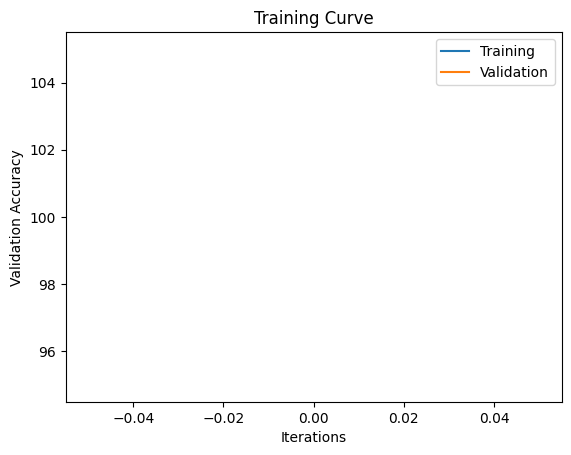

Final Training Accuracy: 100.0
Final Validation Accuracy: 100.0


In [ ]:
#primary model、
use_cuda=False
model2 = CNN()
CNN_train(model2, train_set, val_set)